## WS25: Seminar: Business Analytics (Master) - BWL 12
### Topic: Supply Chain Resilience under Disruptions — An Agent-Based Simulation with Mesa

In [4]:
# ---------------------------
# 1. Import packages
# ---------------------------
import pandas as pd
import matplotlib.pyplot as plt
from model import MultiTierModel
import seaborn as sns

sns.set_style("whitegrid")


In [5]:

# ---------------------------
# 2. Base assumptions
# ---------------------------
assumptions = {
    "n_suppliers": 3,
    "n_plants": 3,
    "n_dcs": 2,
    "n_retailers": 5,
    "base_stock": {"supplier": 100, "plant": 80, "dc": 60, "retailer": 30},
    "capacity": {"supplier": 20, "plant": 15, "dc": 10, "retailer": 0},
    "lead_time": {"supplier": 1, "plant": 5, "dc": 5, "retailer": 2},
    "capacity_loss_frac": 0.5,
    "recovery_duration": 5
}

n_steps = 50
policies = [False, True]  # Single=False, Dual=True


Disruption at step 10 | Victim: <Firm 5 | Tier: plant | Inv: 95 | Backlog: 0 | On order: 0>
Disruption at step 10 | Victim: <Firm 5 | Tier: plant | Inv: 230 | Backlog: 0 | On order: 0>


/tmp/ipykernel_36556/3815602807.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="dual_sourcing", y=metric, data=df, ax=ax, palette="Set2")
/tmp/ipykernel_36556/3815602807.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="dual_sourcing", y=metric, data=df, ax=ax, palette="Set2")
/tmp/ipykernel_36556/3815602807.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="dual_sourcing", y=metric, data=df, ax=ax, palette="Set2")
/tmp/ipykernel_36556/3815602807.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecat

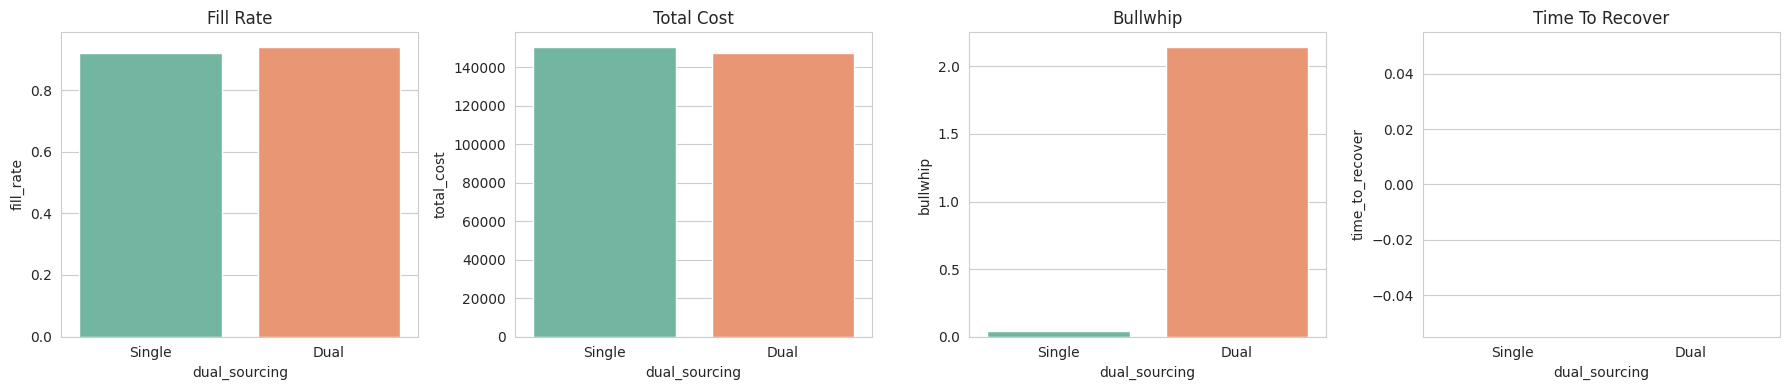

=== KPI Comparison: Single vs Dual Sourcing ===
  dual_sourcing  fill_rate  total_cost  bullwhip  time_to_recover
0        Single   0.921849      150611  0.044925              NaN
1          Dual   0.940336      147514  2.145100              NaN


In [6]:

# ---------------------------
# 3. Run simulation for each policy
# ---------------------------
records = []

for dual in policies:
    model = MultiTierModel(
    assumptions=assumptions,
    seed=42,
    dual_sourcing=True,
    disruption_at_step=10)
    
    for _ in range(n_steps):
        model.step()
    
    records.append({
        "dual_sourcing": "Dual" if dual else "Single",
        "fill_rate": model.compute_fill_rate(),
        "total_cost": model.compute_total_cost(),
        "bullwhip": model.compute_bullwhip(),
        "time_to_recover": model.compute_time_to_recover()
    })

df = pd.DataFrame(records)

# ---------------------------
# 4. Plot KPI comparison
# ---------------------------
metrics = ["fill_rate","total_cost","bullwhip","time_to_recover"]
fig, axs = plt.subplots(1,4, figsize=(18,4))

for i, metric in enumerate(metrics):
    ax = axs[i]
    sns.barplot(x="dual_sourcing", y=metric, data=df, ax=ax, palette="Set2")
    ax.set_title(metric.replace("_"," ").title())
    
plt.tight_layout()
plt.show()

print("=== KPI Comparison: Single vs Dual Sourcing ===")
print(df)
